In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_fear_greed = pd.read_csv('fear_greed_index.csv')
df_historical_data = pd.read_csv('historical_data.csv')

In [7]:
print("--- Fear and Greed Index Data (First 5 Rows) ---")
print(df_fear_greed.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Fear and Greed Index Info ---")
print(df_fear_greed.info())

print("\n--- Historical Data (First 5 Rows) ---")
print(df_historical_data.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Historical Data Info ---")
print(df_historical_data.info())

--- Fear and Greed Index Data (First 5 Rows) ---
| timestamp   | value   | classification   | date       |
|:------------|:--------|:-----------------|:-----------|
| 1517463000  | 30      | Fear             | 2018-02-01 |
| 1517549400  | 15      | Extreme Fear     | 2018-02-02 |
| 1517635800  | 40      | Fear             | 2018-02-03 |
| 1517722200  | 24      | Extreme Fear     | 2018-02-04 |
| 1517808600  | 11      | Extreme Fear     | 2018-02-05 |

--- Fear and Greed Index Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

--- Historical Data (First 5 Rows) ---
| Account                                   

In [8]:
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])
df_historical_data['Date'] = pd.to_datetime(df_historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
df_historical_data['Date'] = pd.to_datetime(df_historical_data['Date'])


In [9]:
df_fear_greed['date']

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


In [10]:
df_historical_data['Date']

,Date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
116521,2025-02-20
116522,2025-02-21
116523,2025-02-21
116524,2025-02-21


In [11]:
df_historical_data['Date']

,Date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
116521,2025-02-20
116522,2025-02-21
116523,2025-02-21
116524,2025-02-21


In [12]:
merged_df = pd.merge(df_historical_data, df_fear_greed, left_on='Date', right_on='date', how='inner')

print("\n--- Merged Dataframe Head ---")
print(merged_df.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Merged Dataframe Info ---")
print(merged_df.info())


--- Merged Dataframe Head ---
| Account                                    | Coin   | Execution Price   | Size Tokens   | Size USD   | Side   | Timestamp IST    | Start Position   | Direction   | Closed PnL   | Transaction Hash                                                   | Order ID    | Crossed   | Fee        | Trade ID   | Timestamp   | Date                | timestamp   | value   | classification   | date                |
|:-------------------------------------------|:-------|:------------------|:--------------|:-----------|:-------|:-----------------|:-----------------|:------------|:-------------|:-------------------------------------------------------------------|:------------|:----------|:-----------|:-----------|:------------|:--------------------|:------------|:--------|:-----------------|:--------------------|
| 0xae5eacaf9c6b9111fd53034a602c192a04e082ed | @107   | 7.9769            | 986.87        | 7872.16    | BUY    | 02-12-2024 22:50 | 0                | Buy        

In [13]:
daily_metrics = merged_df.groupby(['Date', 'classification']).agg(
    total_PnL=('Closed PnL', 'sum'),
    total_fees=('Fee', 'sum'),
    total_volume_usd=('Size USD', 'sum'),
    avg_size_usd_per_trade=('Size USD', 'mean')
).reset_index()

In [14]:
print("\n--- Daily Metrics Head ---")
print(daily_metrics.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\n--- Daily Metrics Info ---")
print(daily_metrics.info())


--- Daily Metrics Head ---
| Date                | classification   | total_PnL   | total_fees   | total_volume_usd   | avg_size_usd_per_trade   |
|:--------------------|:-----------------|:------------|:-------------|:-------------------|:-------------------------|
| 2023-05-01 00:00:00 | Greed            | 0           | 0            | 477                | 159                      |
| 2023-12-05 00:00:00 | Extreme Greed    | 0           | 12.5015      | 50005.8            | 5556.2                   |
| 2023-12-14 00:00:00 | Greed            | -205.435    | 28.3008      | 113203             | 10291.2                  |
| 2023-12-15 00:00:00 | Greed            | -24.632     | 2.65249      | 10610              | 5304.98                  |
| 2023-12-16 00:00:00 | Greed            | 0           | 3.83719      | 15348.8            | 5116.26                  |

--- Daily Metrics Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):


# Analyze Trading Behavior Across Market Sentiments

In [15]:
sentiment_analysis = daily_metrics.groupby('classification').mean().reset_index()

print("\n--- Sentiment Analysis (Mean values per classification) ---")
print(sentiment_analysis.to_markdown(index=False, numalign="left", stralign="left"))


--- Sentiment Analysis (Mean values per classification) ---
| classification   | Date                          | total_PnL   | total_fees   | total_volume_usd   | avg_size_usd_per_trade   |
|:-----------------|:------------------------------|:------------|:-------------|:-------------------|:-------------------------|
| Extreme Fear     | 2025-01-27 13:42:51.428571392 | 40922       | 502.106      | 2.86143e+06        | 4224.49                  |
| Extreme Greed    | 2024-08-03 01:41:03.157894656 | 15608.5     | 179.166      | 780418             | 6947.75                  |
| Fear             | 2024-11-26 15:44:00           | 28149.6     | 642.45       | 3.72283e+06        | 7546.29                  |
| Greed            | 2024-06-29 12:41:02.176165888 | 8168.72     | 271.098      | 1.21928e+06        | 7490.23                  |
| Neutral          | 2024-10-09 14:41:11.641790976 | 17856.1     | 438.539      | 2.05318e+06        | 7537.63                  |


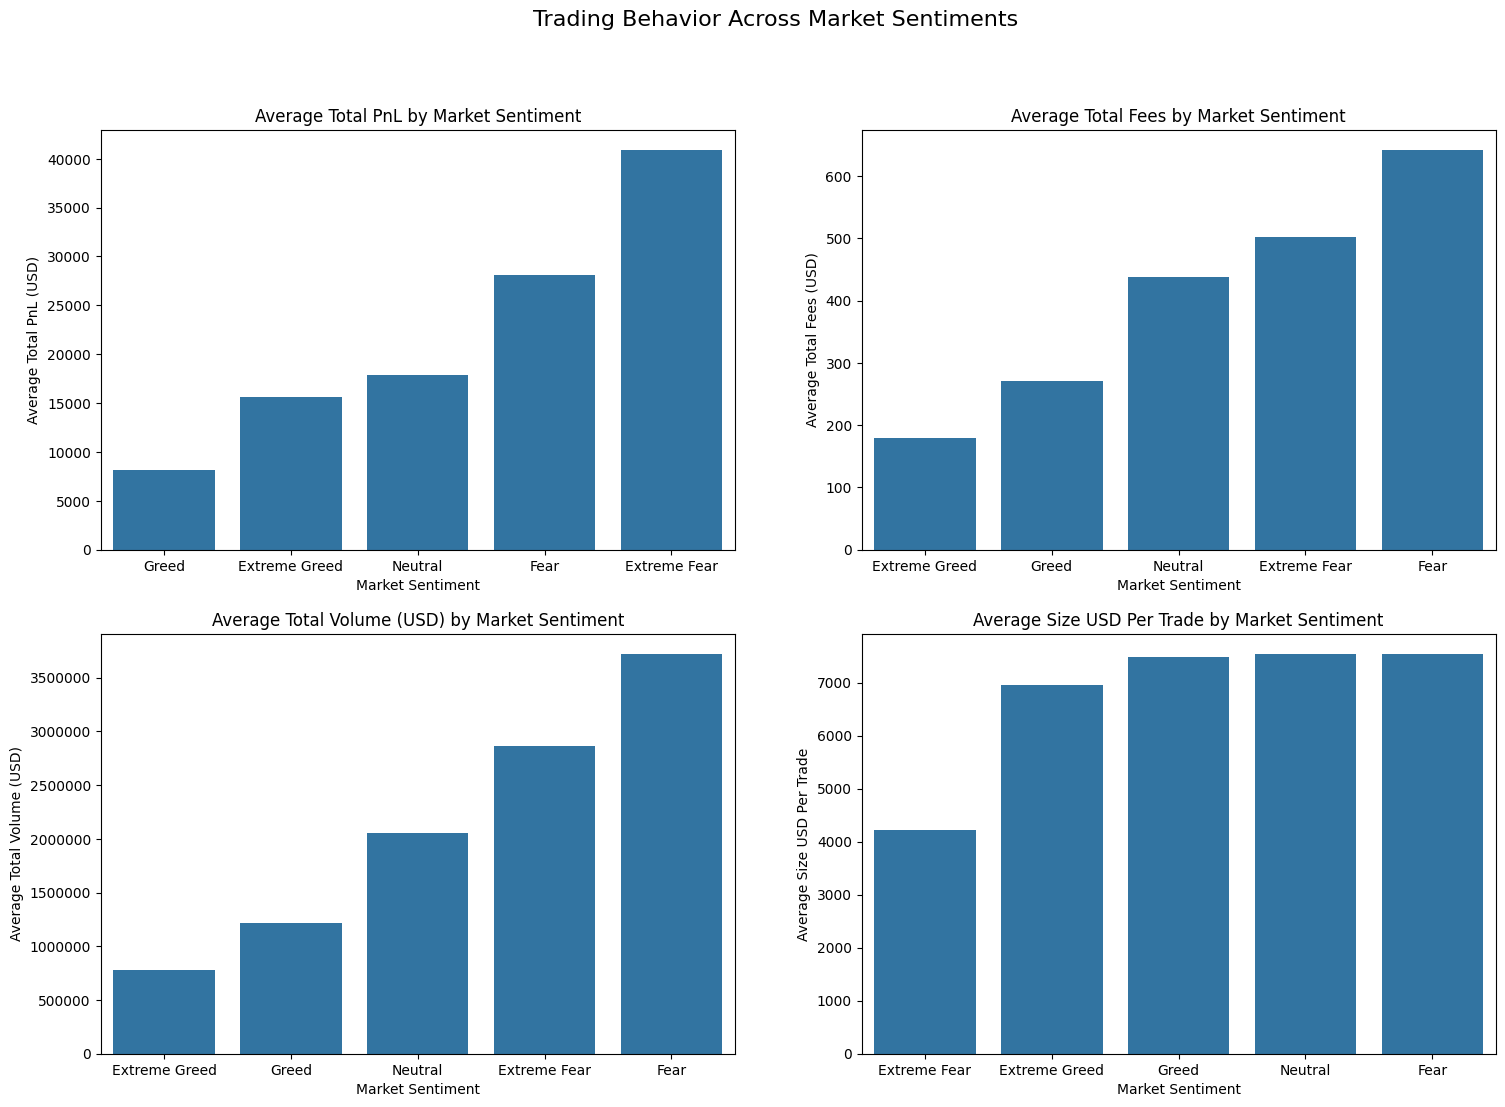

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Trading Behavior Across Market Sentiments', fontsize=16)


sns.barplot(ax=axes[0, 0], x='classification', y='total_PnL', data=sentiment_analysis, order=sentiment_analysis.sort_values('total_PnL')['classification'])
axes[0, 0].set_title('Average Total PnL by Market Sentiment')
axes[0, 0].set_xlabel('Market Sentiment')
axes[0, 0].set_ylabel('Average Total PnL (USD)')
axes[0, 0].ticklabel_format(style='plain', axis='y')


sns.barplot(ax=axes[0, 1], x='classification', y='total_fees', data=sentiment_analysis, order=sentiment_analysis.sort_values('total_fees')['classification'])
axes[0, 1].set_title('Average Total Fees by Market Sentiment')
axes[0, 1].set_xlabel('Market Sentiment')
axes[0, 1].set_ylabel('Average Total Fees (USD)')
axes[0, 1].ticklabel_format(style='plain', axis='y')


sns.barplot(ax=axes[1, 0], x='classification', y='total_volume_usd', data=sentiment_analysis, order=sentiment_analysis.sort_values('total_volume_usd')['classification'])
axes[1, 0].set_title('Average Total Volume (USD) by Market Sentiment')
axes[1, 0].set_xlabel('Market Sentiment')
axes[1, 0].set_ylabel('Average Total Volume (USD)')
axes[1, 0].ticklabel_format(style='plain', axis='y')

sns.barplot(ax=axes[1, 1], x='classification', y='avg_size_usd_per_trade', data=sentiment_analysis, order=sentiment_analysis.sort_values('avg_size_usd_per_trade')['classification'])
axes[1, 1].set_title('Average Size USD Per Trade by Market Sentiment')
axes[1, 1].set_xlabel('Market Sentiment')
axes[1, 1].set_ylabel('Average Size USD Per Trade')
axes[1, 1].ticklabel_format(style='plain', axis='y')

In [19]:
print("\n--- Number of trading days for each market sentiment ---")
print(daily_metrics['classification'].value_counts().to_markdown(numalign="left", stralign="left"))


--- Number of trading days for each market sentiment ---
| classification   | count   |
|:-----------------|:--------|
| Greed            | 193     |
| Extreme Greed    | 114     |
| Fear             | 90      |
| Neutral          | 67      |
| Extreme Fear     | 14      |


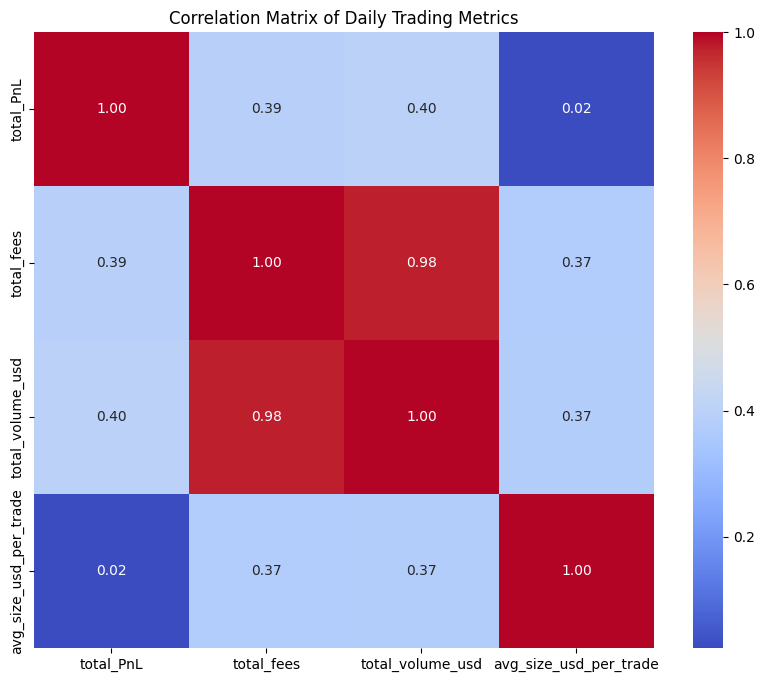

In [22]:
correlation_matrix = daily_metrics[['total_PnL', 'total_fees', 'total_volume_usd', 'avg_size_usd_per_trade']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Trading Metrics')
plt.show()

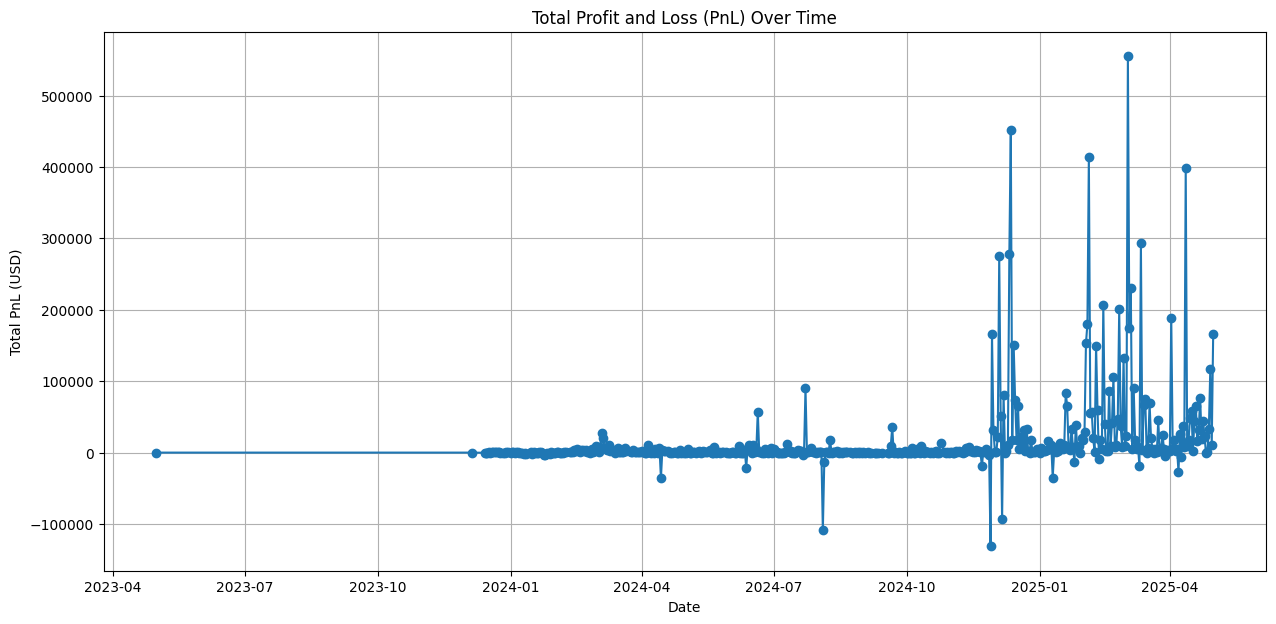

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(daily_metrics['Date'], daily_metrics['total_PnL'], marker='o', linestyle='-')
plt.title('Total Profit and Loss (PnL) Over Time')
plt.xlabel('Date')
plt.ylabel('Total PnL (USD)')
plt.grid(True)
plt.show()